In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
a1=pd.readmov_avg_csv('TSLA.csv')


In [3]:
a1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-02-21,204.990005,209.710007,197.220001,197.369995,197.369995,180018600
1,2023-02-22,197.929993,201.990005,191.779999,200.860001,200.860001,191828500
2,2023-02-23,203.910004,205.139999,196.330002,202.070007,202.070007,146360000
3,2023-02-24,196.330002,197.669998,192.800003,196.880005,196.880005,142228100
4,2023-02-27,202.029999,209.419998,201.259995,207.630005,207.630005,161028300
...,...,...,...,...,...,...,...
245,2024-02-12,192.110001,194.729996,187.279999,188.130005,188.130005,95498600
246,2024-02-13,183.990005,187.259995,182.110001,184.020004,184.020004,86759500
247,2024-02-14,185.300003,188.889999,183.350006,188.710007,188.710007,81203000
248,2024-02-15,189.160004,200.880005,188.860001,200.449997,200.449997,120831800


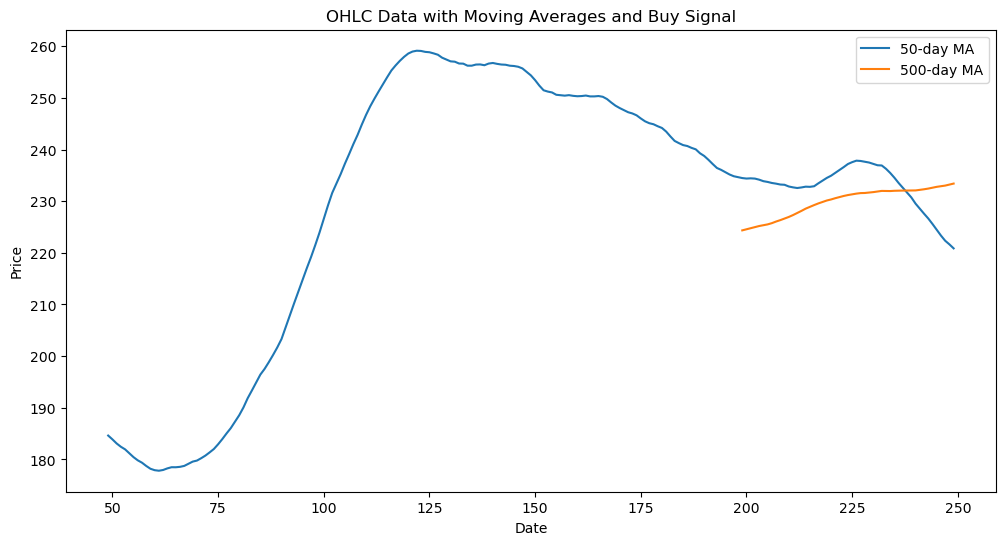

In [4]:
a1['mov_avg_50'] = a1['Close'].rolling(window=50).mean()
a1['mov_avg_500'] = (a1['Close']).rolling(window=200).mean()


a1['Signal'] = 0

a1.loc[a1['mov_avg_50'] >a1['mov_avg_500'], 'Signal'] = 1


plt.figure(figsize=(12, 6))

plt.plot(a1.index, a1['mov_avg_50'], label='50-day ')
plt.plot(a1.index, a1['mov_avg_500'], label='500-day ')
# plt.plot(a1[a1['Signal'] == 1].index, a1['mov_avg_50'][a1['Signal'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.title('OHLC Data with Moving Averages and Buy Signal')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

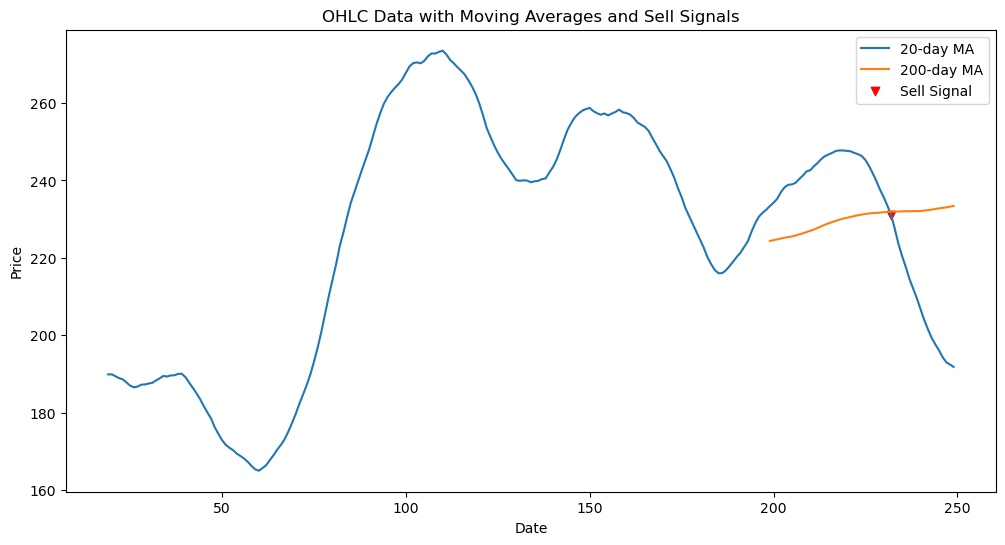

In [5]:
a1['mov_avg_20'] = a1['Close'].rolling(window=20).mean()
a1['mov_avg_200'] = a1['Close'].rolling(window=200).mean()

a1['Sellmov_avg_Signal'] = 0
a1.loc[(a1['mov_avg_20'] < a1['mov_avg_200']) & (a1['mov_avg_20'].shift(1) > a1['mov_avg_200'].shift(1)), 'Sell Signal'] = 1

plt.figure(figsize=(12, 6))
plt.plot(a1.index, a1['mov_avg_20'], label='20-day ')
plt.plot(a1.index, a1['mov_avg_200'], label='200-day ')
plt.scatter(a1[a1['Sellmov_avg_Signal'] == 1].index, a1['mov_avg_20'][a1['Sellmov_avg_Signal'] == 1], marker='v', color='r', label='Sell Signal')
plt.title('OHLC Data with Moving Averages and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [6]:
from datetime import datetime
a1['Date']=pd.tomov_avg_datetime(a1['Date'])

In [7]:

a1['mov_avg_10'] = a1['Close'].rolling(window=10).mean()
a1['mov_avg_20'] = a1['Close'].rolling(window=20).mean()

a1['Closemov_avg_Signal'] = 0
a1.loc[(a1['mov_avg_10'] < a1['mov_avg_20']) & (a1['mov_avg_10'].shift(1) > a1['mov_avg_20'].shift(1)), 'Closemov_avg_Signal'] = 1
a1.index=a1['Date']
for index, row in a1.iterrows():
    if row['Closemov_avg_Signal'] == 1:
        print(f"Closing buy position on {index.date()} at price {row['Close']}")
    


Closing buy position on 2023-04-14 at price 185.0
Closing buy position on 2023-07-28 at price 266.440002
Closing buy position on 2023-09-27 at price 240.5
Closing buy position on 2023-10-20 at price 211.990005
Closing buy position on 2024-01-08 at price 240.449997


In [11]:
a1['mov_avg_5'] = a1['Close'].rolling(window=5).mean()
a1['mov_avg_10'] = a1['Close'].rolling(window=10).mean()

a1['Closemov_avg_Signal'] = 0
a1.loc[(a1['mov_avg_5'] > a1['mov_avg_10']) & (a1['mov_avg_5'].shift(1) < a1['mov_avg_10'].shift(1)), 'Closemov_avg_Signal'] = 1
if row['Closemov_avg_Signal'] == 1:
     print(f"Closing sell position on {row['Date'].date()} at price {row['Close']}")


In [16]:



a1['mov_avg_5'] = a1['Close'].rolling(window=5).mean()
a1['mov_avg_10'] = a1['Close'].rolling(window=10).mean()

a1['Closemov_avg_Signal'] = 0
a1.loc[(a1['mov_avg_5'] > a1['mov_avg_10']) & (a1['mov_avg_5'].shift(1) < a1['mov_avg_10'].shift(1)), 'Closemov_avg_Signal'] = 1
for index, row in a1.iterrows():
    if row['Closemov_avg_Signal'] == 1:
        print(f"Closing sell position on {row['Date'].date()} at price {row['Close']}")

Closing sell position on 2023-03-20 at price 183.25
Closing sell position on 2023-04-19 at price 180.589996
Closing sell position on 2023-05-03 at price 160.610001
Closing sell position on 2023-05-19 at price 180.139999
Closing sell position on 2023-07-03 at price 279.820007
Closing sell position on 2023-07-17 at price 290.380005
Closing sell position on 2023-08-25 at price 238.589996
Closing sell position on 2023-10-04 at price 261.160004
Closing sell position on 2023-11-06 at price 219.270004
Closing sell position on 2023-12-12 at price 237.009995
Closing sell position on 2024-02-12 at price 188.130005


In [40]:
a2['mov_avg_50'] = a2['Close'].rolling(window=50).mean()
a2['mov_avg_500'] = (a2['Close']).rolling(window=400).mean()


In [47]:
len(a2["mov_avg_50"]),len(a2["mov_avg_500"])

(2966, 2966)

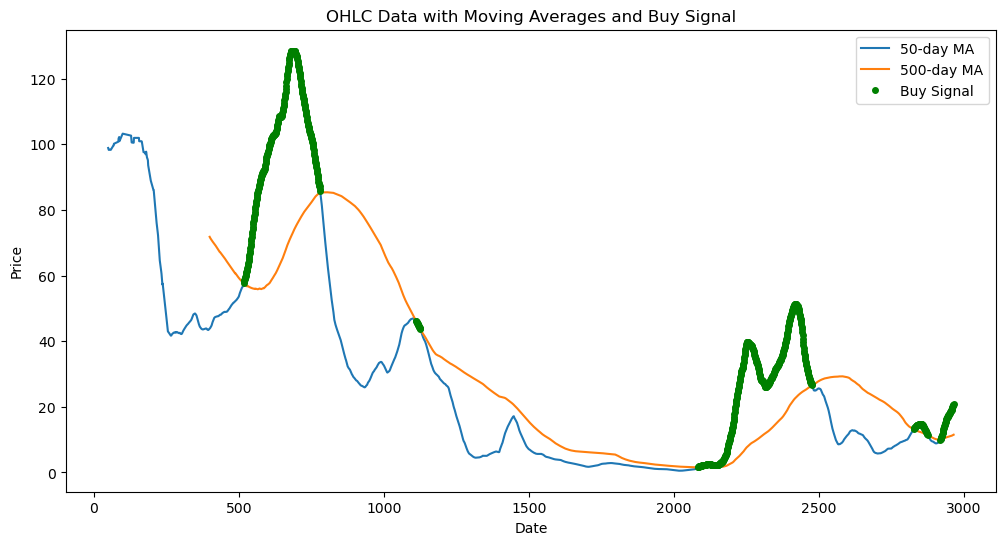

In [62]:

a2['Signal'] = 0

a2.loc[a2['mov_avg_50'] > a2['mov_avg_500'], 'Signal'] = 1

plt.figure(figsize=(12, 6))
# plt.plot(a2.index, a2['Close'], label='Close Price')
plt.plot(a2.index, a2['mov_avg_50'], label='50-day mov_avg')
plt.plot(a2.index, a2['mov_avg_500'], label='500-day mov_avg')
plt.plot(a2[a2['Signal'] == 1].index, a2['mov_avg_50'][a2['Signal'] == 1], 'o', markersize=4, color='g', lw=0, label='Buy Signal')
plt.title('OHLC Data with Moving Averages and Buy Signal')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [5]:
a2=pd.readmov_avg_csv('RA.csv')

In [6]:
a2

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-04,53.040001,119.599998,53.040001,119.599998,119.599998,6
1,2012-05-07,119.599998,119.599998,119.599998,119.599998,119.599998,0
2,2012-05-08,53.040001,104.000000,53.040001,104.000000,104.000000,6
3,2012-05-09,104.000000,104.000000,104.000000,104.000000,104.000000,0
4,2012-05-10,104.000000,104.000000,104.000000,104.000000,104.000000,0
...,...,...,...,...,...,...,...
2961,2024-02-12,23.600000,27.549999,23.600000,27.280001,27.280001,102363900
2962,2024-02-13,24.400000,26.400000,24.100000,25.719999,25.719999,77122100
2963,2024-02-14,29.030001,29.730000,28.110001,29.410000,29.410000,79211200
2964,2024-02-15,30.000000,30.450001,26.160000,27.020000,27.020000,97860300


In [7]:
a3=pd.readmov_avg_csv('AAPL.csv')
a3

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-02-21,150.199997,151.300003,148.410004,148.479996,147.691666,58867200
1,2023-02-22,148.869995,149.949997,147.160004,148.910004,148.119370,51011300
2,2023-02-23,150.089996,150.339996,147.240005,149.399994,148.606766,48394200
3,2023-02-24,147.110001,147.190002,145.720001,146.710007,145.931061,55469600
4,2023-02-27,147.710007,149.169998,147.449997,147.919998,147.134628,44998500
...,...,...,...,...,...,...,...
245,2024-02-12,188.419998,188.669998,186.789993,187.149994,187.149994,41781900
246,2024-02-13,185.770004,186.210007,183.509995,185.039993,185.039993,56529500
247,2024-02-14,185.320007,185.529999,182.440002,184.149994,184.149994,54630500
248,2024-02-15,183.550003,184.490005,181.350006,183.860001,183.860001,65434500


In [40]:
a2['mov_avg_50'] = a2['Close'].rolling(window=50).mean()
a2['mov_avg_500'] = (a2['Close']).rolling(window=400).mean()


In [47]:
len(a2["mov_avg_50"]),len(a2["mov_avg_500"])

(2966, 2966)

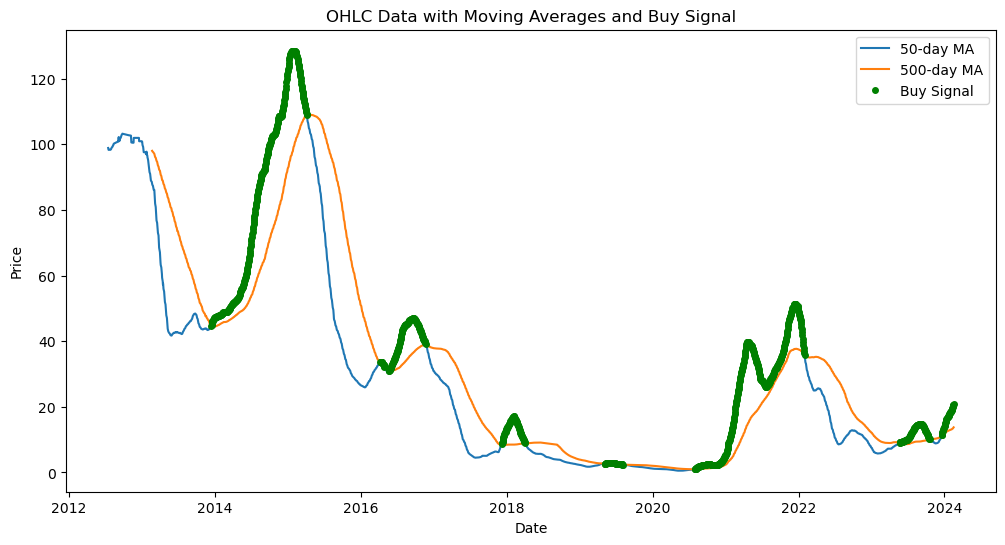

In [3]:

a2['Signal'] = 0

a2.loc[a2['mov_avg_50'] > a2['mov_avg_500'], 'Signal'] = 1

plt.figure(figsize=(12, 6))
# plt.plot(a2.index, a2['Close'], label='Close Price')
plt.plot(a2.index, a2['mov_avg_50'], label='50-day ')
plt.plot(a2.index, a2['mov_avg_500'], label='500-day ')
plt.plot(a2[a2['Signal'] == 1].index, a2['mov_avg_50'][a2['Signal'] == 1], 'o', markersize=4, color='g', lw=0, label='Buy Signal')
plt.title('OHLC Data with Moving Averages and Buy Signal')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
a2['mov_avg_50'] = a2['Close'].rolling(window=50).mean()
a2['mov_avg_500'] = (a2['Close']).rolling(window=400).mean()


len(a2["mov_avg_50"]),len(a2["mov_avg_500"])


a2['Signal'] = 0

a2.loc[a2['mov_avg_50'] > a2['mov_avg_500'], 'Signal'] = 1

plt.figure(figsize=(12, 6))
# plt.plot(a2.index, a2['Close'], label='Close Price')
plt.plot(a2.index, a2['mov_avg_50'], label='50-day ')
plt.plot(a2.index, a2['mov_avg_500'], label='500-day ')
plt.plot(a2[a2['Signal'] == 1].index, a2['mov_avg_50'][a2['Signal'] == 1], 'o', markersize=4, color='g', lw=0, label='Buy Signal')
plt.title('OHLC Data with Moving Averages and Buy Signal')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [8]:
a4=pd.readmov_avg_csv('HDB.csv')
a4

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-02-19,49.619999,49.735001,49.029999,49.169998,47.604424,2082800
1,2019-02-20,49.665001,49.950001,49.570000,49.825001,48.238567,1705800
2,2019-02-21,49.834999,50.259998,49.715000,50.040001,48.446720,879600
3,2019-02-22,49.895000,50.325001,49.750000,50.119999,48.524174,1178400
4,2019-02-25,50.270000,51.209999,50.270000,50.935001,49.313221,1121800
...,...,...,...,...,...,...,...
1254,2024-02-12,53.230000,53.259998,52.599998,53.000000,53.000000,3111500
1255,2024-02-13,52.639999,52.650002,52.160000,52.360001,52.360001,4612100
1256,2024-02-14,52.770000,52.939999,52.310001,52.779999,52.779999,3169200
1257,2024-02-15,53.560001,54.500000,53.509998,54.189999,54.189999,2832700


In [9]:
a5=pd.readmov_avg_csv('INR=X.csv')
a5

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-02-19,71.376503,71.610001,71.239998,71.699997,71.699997,0.0
1,2019-02-20,71.305000,71.330002,70.931999,71.599998,71.599998,0.0
2,2019-02-21,71.049004,71.233002,70.930000,71.300003,71.300003,0.0
3,2019-02-22,71.184998,71.230003,71.019997,71.184998,71.184998,0.0
4,2019-02-25,71.027496,71.150002,70.814903,71.030998,71.030998,0.0
...,...,...,...,...,...,...,...
1300,2024-02-13,82.990196,83.111397,82.961700,82.990196,82.990196,0.0
1301,2024-02-14,83.074600,83.115997,83.013000,83.074600,83.074600,0.0
1302,2024-02-15,83.043098,83.050697,82.962799,83.043098,83.043098,0.0
1303,2024-02-16,83.009598,83.052299,82.972801,83.009598,83.009598,0.0


In [10]:
a6=pd.readmov_avg_csv('JIOFIN.NS.csv')
a6

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-08-21,262.000000,262.049988,248.899994,248.899994,248.899994,74715306.0
1,2023-08-22,236.449997,236.449997,236.449997,236.449997,236.449997,7281398.0
2,2023-08-23,224.649994,224.649994,224.649994,224.649994,224.649994,4289046.0
3,2023-08-24,213.449997,213.449997,213.449997,213.449997,213.449997,27673350.0
4,2023-08-25,202.800003,224.100006,202.800003,214.500000,214.500000,281040100.0
...,...,...,...,...,...,...,...
117,2024-02-12,276.100006,281.100006,267.700012,271.450012,271.450012,47043870.0
118,2024-02-13,270.450012,275.399994,263.700012,272.750000,272.750000,31220100.0
119,2024-02-14,269.899994,275.000000,268.549988,273.000000,273.000000,21374190.0
120,2024-02-15,275.000000,279.000000,273.000000,274.049988,274.049988,19477720.0


In [11]:
a7=pd.readmov_avg_csv('TATAMOTORS.NS.csv')
a7

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-02-20,441.799988,445.299988,436.250000,443.000000,441.623596,9717197
1,2023-02-21,445.200012,445.200012,435.250000,436.500000,435.143799,8957930
2,2023-02-22,435.299988,435.850006,428.250000,429.450012,428.115692,7209130
3,2023-02-23,428.649994,436.450012,427.200012,433.200012,431.854065,9278920
4,2023-02-24,435.399994,436.700012,427.000000,427.750000,426.420990,7895024
...,...,...,...,...,...,...,...
239,2024-02-12,916.099976,925.000000,908.000000,911.599976,911.599976,7286778
240,2024-02-13,911.599976,919.099976,894.000000,906.900024,906.900024,8574218
241,2024-02-14,900.000000,919.950012,894.349976,918.299988,918.299988,6570939
242,2024-02-15,923.700012,927.000000,916.349976,920.549988,920.549988,6430799


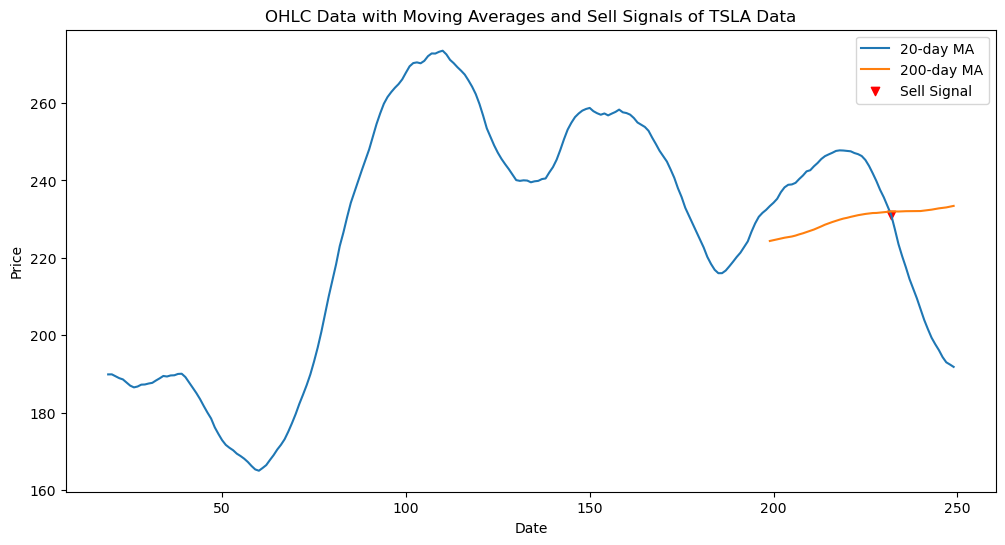

Closing signal for  buy position on TSLA Data




Closing buy position on 2023-04-14 at price 185.0
Closing buy position on 2023-07-28 at price 266.440002
Closing buy position on 2023-09-27 at price 240.5
Closing buy position on 2023-10-20 at price 211.990005
Closing buy position on 2024-01-08 at price 240.449997
Closing signal for  sell position on TSLA Data




Closing sell position on 2023-03-20 at price 183.25
Closing sell position on 2023-04-19 at price 180.589996
Closing sell position on 2023-05-03 at price 160.610001
Closing sell position on 2023-05-19 at price 180.139999
Closing sell position on 2023-07-03 at price 279.820007
Closing sell position on 2023-07-17 at price 290.380005
Closing sell position on 2023-08-25 at price 238.589996
Closing sell position on 2023-10-04 at price 261.160004
Closing sell position on 2023-11-06 at price 219.270004
Closing sell position on 2023-12-12 at price 237.009995
Closing sell position on 2024-02-12 at price 188.130005


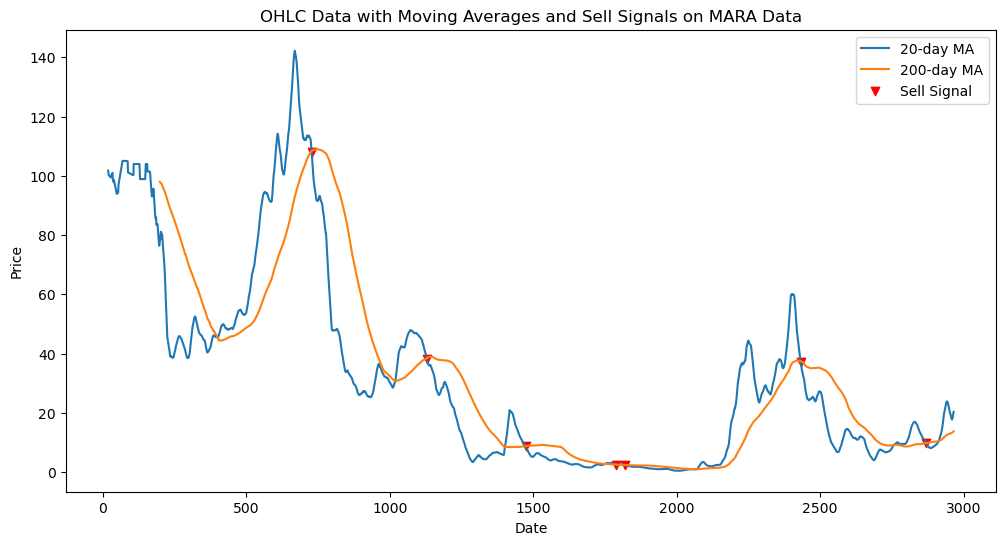

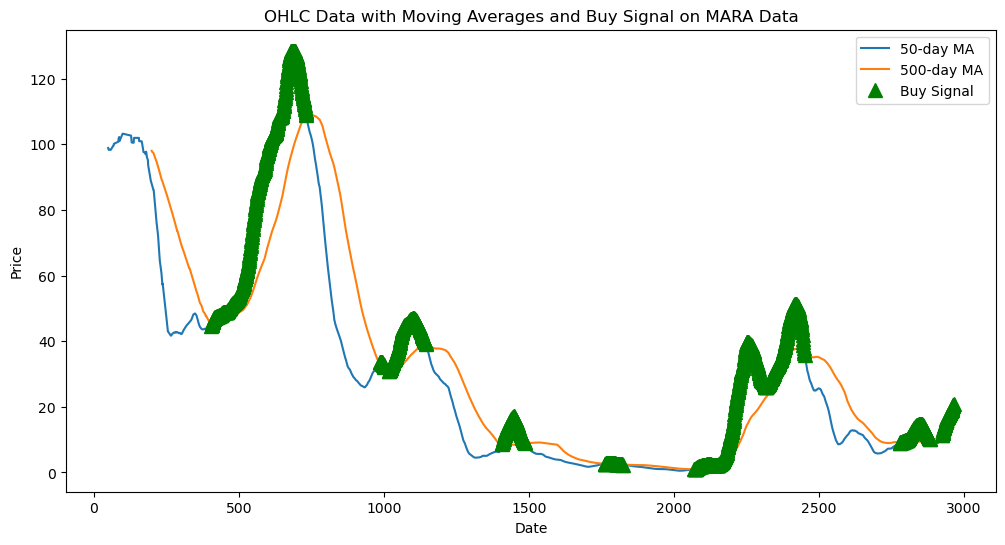

Closing signal for buy position on MARA Data




Closing buy position on 2012-06-25 at price 53.040001
Closing buy position on 2013-01-04 at price 76.959999
Closing buy position on 2013-01-29 at price 72.800003
Closing buy position on 2013-03-06 at price 52.0
Closing buy position on 2013-05-28 at price 43.68
Closing buy position on 2013-08-13 at price 49.599998
Closing buy position on 2013-09-25 at price 41.200001
Closing buy position on 2013-11-20 at price 44.0
Closing buy position on 2014-01-03 at price 47.599998
Closing buy position on 2014-02-06 at price 46.560001
Closing buy position on 2014-03-26 at price 53.599998
Closing buy position on 2014-08-06 at price 90.480003
Closing buy position on 2014-10-03 at price 111.68
Closing buy position on 2015-01-06 at price 124.959999
Closing buy position on 2015-03-16 at price 107.68
Closing buy position on 2015-05-07 at price 91.68
Closing buy position on 2015-07-30 at price 48.16
Closing buy position on 2015-09-22 at price 36.0
Closing buy

Closing sell position on 2022-10-20 at price 10.92
Closing sell position on 2022-12-05 at price 6.14
Closing sell position on 2023-01-05 at price 3.91
Closing sell position on 2023-02-17 at price 7.7
Closing sell position on 2023-03-15 at price 7.09
Closing sell position on 2023-04-03 at price 8.43
Closing sell position on 2023-05-02 at price 9.55
Closing sell position on 2023-05-19 at price 9.18
Closing sell position on 2023-06-01 at price 9.99
Closing sell position on 2023-06-16 at price 9.98
Closing sell position on 2023-08-03 at price 16.559999
Closing sell position on 2023-08-30 at price 13.47
Closing sell position on 2023-10-12 at price 7.78
Closing sell position on 2023-10-23 at price 8.75
Closing sell position on 2023-11-15 at price 10.24
Closing sell position on 2024-01-29 at price 18.52
Closing sell position on 2024-02-08 at price 21.58


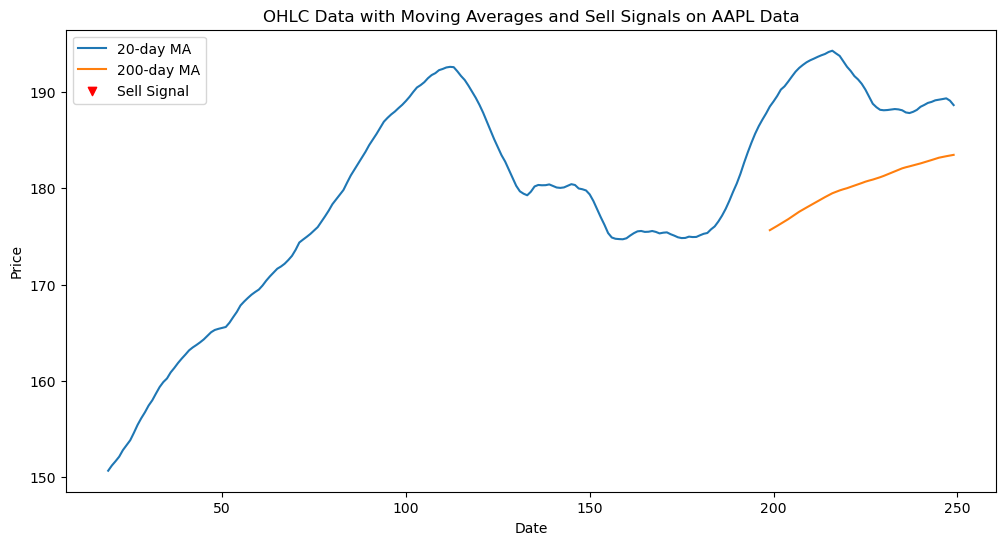

Closing signal for  buy position on AAPL Data




Closing buy position on 2023-08-07 at price 178.850006
Closing buy position on 2023-09-15 at price 175.009995
Closing buy position on 2023-10-26 at price 166.889999
Closing buy position on 2024-01-02 at price 185.639999
Closing buy position on 2024-02-08 at price 188.320007




Closing signal for  sell position on AAPL Data




Closing sell position on 2023-03-16 at price 155.850006
Closing sell position on 2023-04-18 at price 166.470001
Closing sell position on 2023-05-01 at price 169.589996
Closing sell position on 2023-05-19 at price 175.160004
Closing sell position on 2023-05-31 at price 177.25
Closing sell position on 2023-07-18 at price 193.729996
Closing sell position on 2023-07-28 at price 195.830002
Closing sell position on 2023-08-25 at price 178.610001
Closing sell position on 2023-09-22 at price 174.789993
Closing sell position on 2023-10-05 at price 174.910004
Closing sell position on 2023-11-02 at price 177.570007
Closing 

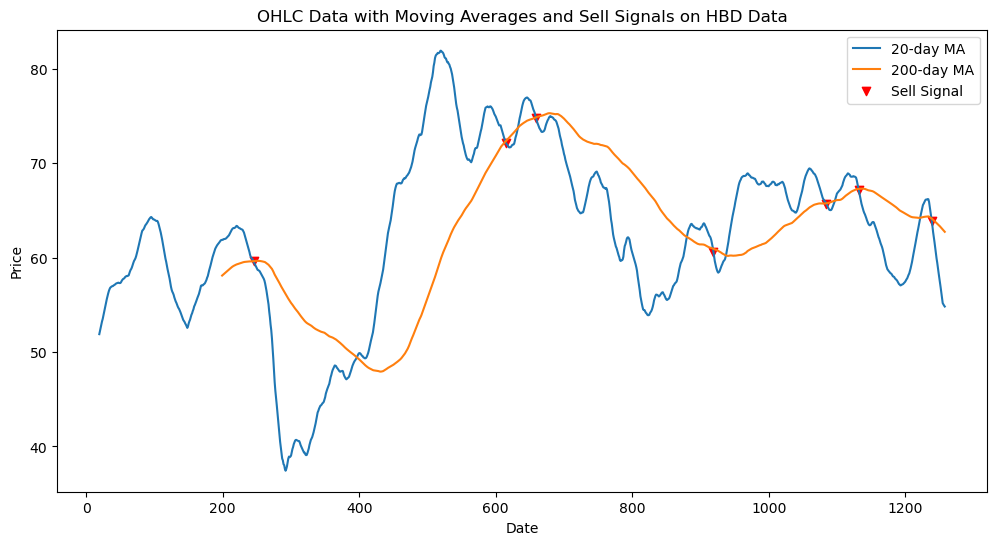

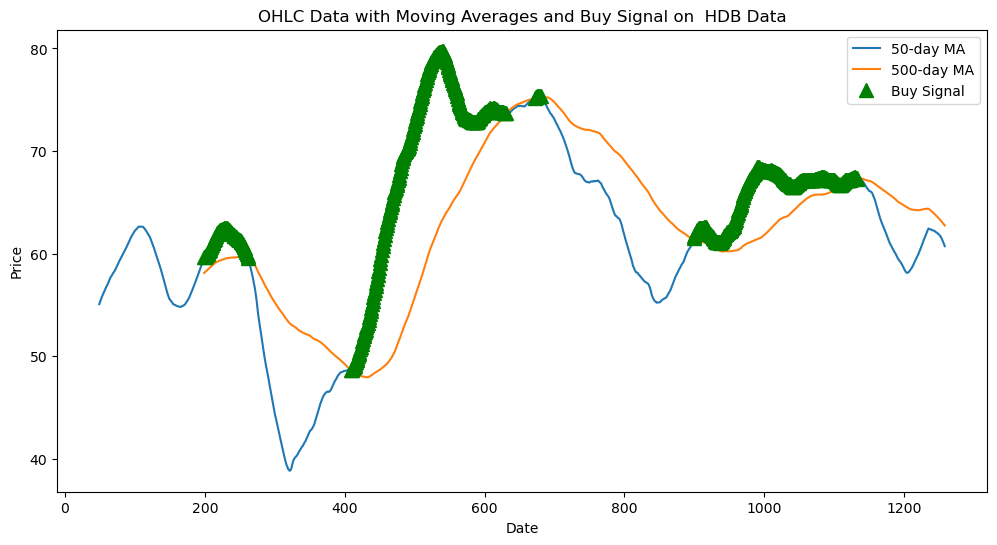

Closing signal for  buy position on HBD Data




Closing buy position on 2019-04-16 at price 57.715
Closing buy position on 2019-06-27 at price 64.385002
Closing buy position on 2019-07-16 at price 62.625
Closing buy position on 2019-10-15 at price 57.029999
Closing buy position on 2020-01-06 at price 60.91
Closing buy position on 2020-02-25 at price 55.720001
Closing buy position on 2020-05-13 at price 37.98
Closing buy position on 2020-06-22 at price 44.720001
Closing buy position on 2020-08-04 at price 46.310001
Closing buy position on 2020-09-17 at price 50.23
Closing buy position on 2020-12-14 at price 66.599998
Closing buy position on 2021-03-03 at price 82.510002
Closing buy position on 2021-03-18 at price 77.800003
Closing buy position on 2021-05-12 at price 68.449997
Closing buy position on 2021-06-23 at price 74.389999
Closing buy position on 2021-09-14 at price 74.089996
Closing buy position on 2021-11-03 at price 72.32
Closing buy position on 2022-01-28 at price 65.459999
C

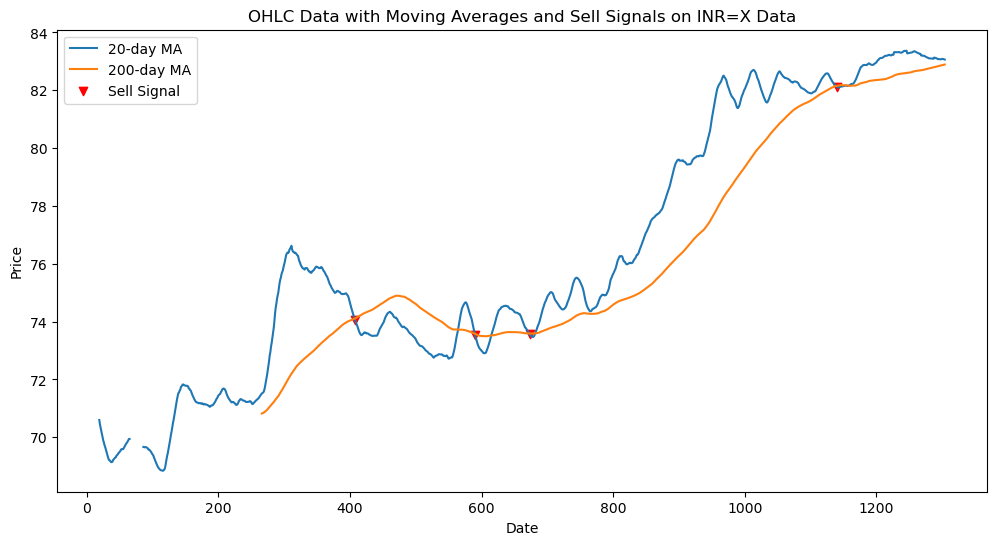

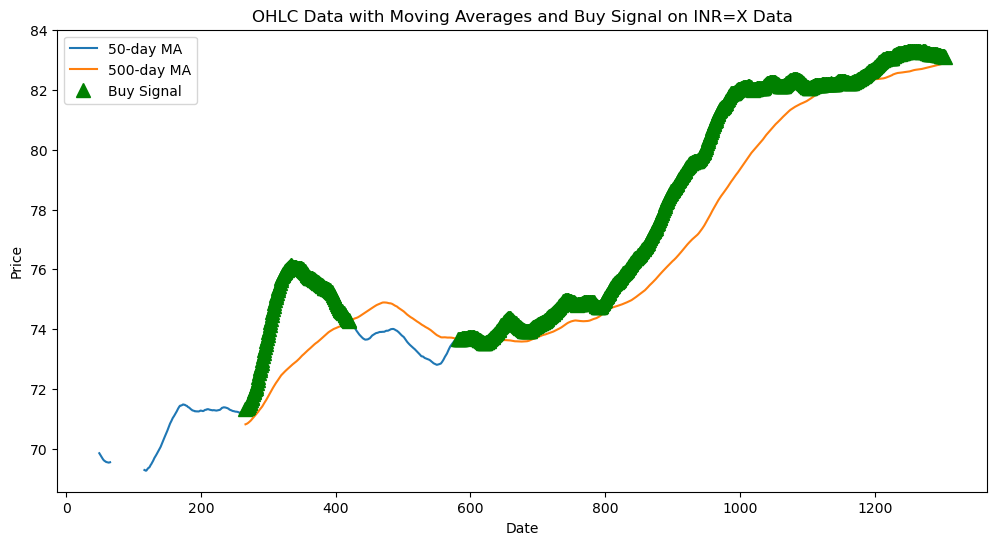

Closing signal for  buy position on INR=X Data




Closing buy position on 2019-05-13 at price 69.922501
Closing buy position on 2019-07-02 at price 69.167503
Closing buy position on 2019-09-18 at price 71.709999
Closing buy position on 2019-10-30 at price 70.884598
Closing buy position on 2019-12-04 at price 71.959999
Closing buy position on 2020-01-17 at price 70.945602
Closing buy position on 2020-02-18 at price 71.349197
Closing buy position on 2020-05-01 at price 75.720001
Closing buy position on 2020-06-03 at price 75.065804
Closing buy position on 2020-06-08 at price 75.5177
Closing buy position on 2020-07-02 at price 75.454903
Closing buy position on 2020-08-19 at price 74.794998
Closing buy position on 2020-10-06 at price 73.108299
Closing buy position on 2020-10-08 at price 73.542503
Closing buy position on 2020-11-26 at price 73.7799
Closing buy position on 2021-03-17 at price 72.515602
Closing buy position on 2021-05-05 at price 73.7789
Closing buy position on 2021-07-28 at

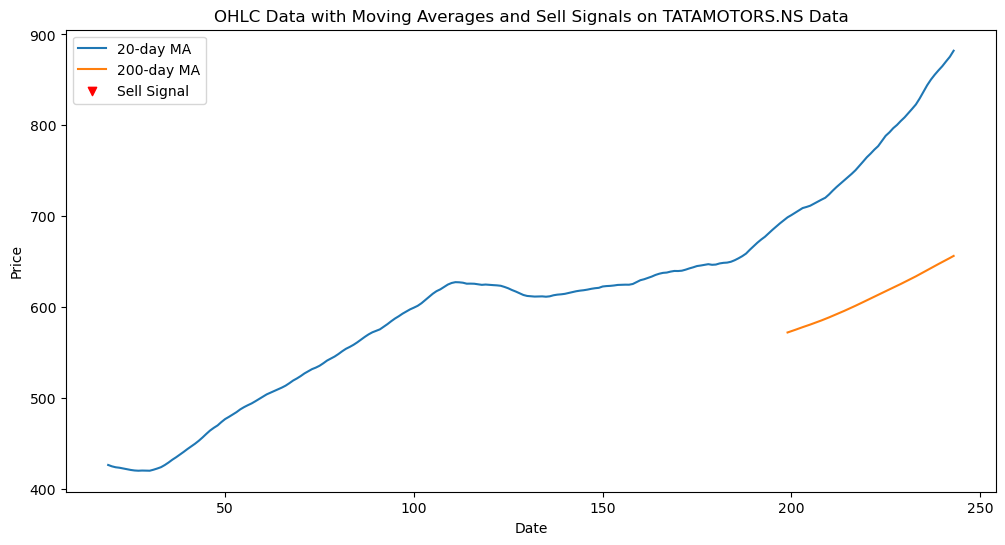

Closing signal for  buy position on TATAMOTORS.NS Data




Closing buy position on 2023-08-10 at price 618.25
Closing buy position on 2023-10-04 at price 613.599976
Closing buy position on 2023-11-02 at price 636.450012




Closing signal for  sell position on TATAMOTORS.NS Data




Closing sell position on 2023-03-08 at price 439.299988
Closing sell position on 2023-03-27 at price 412.049988
Closing sell position on 2023-04-05 at price 426.549988
Closing sell position on 2023-06-01 at price 535.200012
Closing sell position on 2023-06-30 at price 595.549988
Closing sell position on 2023-07-25 at price 639.450012
Closing sell position on 2023-08-16 at price 618.75
Closing sell position on 2023-08-21 at price 620.5
Closing sell position on 2023-09-06 at price 610.25
Closing sell position on 2023-10-06 at price 622.450012
Closing sell position on 2023-10-11 at price 634.0
Closing sell position on 2023-11-06 at price 646.049988
Closing sell position on 2023-12-28 at price 753.900024
Closin

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime
a1=pd.read_csv("TSLA.csv")
a2=pd.read_csv('MARA.csv')
a3=pd.read_csv('AAPL.csv')
a4=pd.read_csv('HDB.csv')
a5=pd.read_csv('INR=X.csv')
a6=pd.read_csv('JIOFIN.NS.csv')
a7=pd.read_csv('TATAMOTORS.NS.csv')
a1['Date']=pd.to_datetime(a1['Date'])
a2['Date']=pd.to_datetime(a2['Date'])
a3['Date']=pd.to_datetime(a3['Date'])
a4['Date']=pd.to_datetime(a4['Date'])
a5['Date']=pd.to_datetime(a5['Date'])
a6['Date']=pd.to_datetime(a6['Date'])
a7['Date']=pd.to_datetime(a7['Date'])

if(a1.shape[0]>=200):
    a1['MA_20'] = a1['Close'].rolling(window=20).mean()
    a1['MA_200'] = a1['Close'].rolling(window=200).mean()

    a1['Sell_Signal'] = 0
    a1.loc[(a1['MA_20'] < a1['MA_200']) & (a1['MA_20'].shift(1) > a1['MA_200'].shift(1)), 'Sell_Signal'] = 1
    plt.figure(figsize=(12, 6))
    plt.plot(a1.index, a1['MA_20'], label='20-day MA')
    plt.plot(a1.index, a1['MA_200'], label='200-day MA')
    plt.scatter(a1[a1['Sell_Signal'] == 1].index, a1['MA_20'][a1['Sell_Signal'] == 1], marker='v', color='r', label='Sell Signal')
    plt.title('OHLC Data with Moving Averages and Sell Signals of TSLA Data')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    if(a1.shape[0]>=500):
        a1['MA_50'] = a1['Close'].rolling(window=50).mean()
        a1['MA_500'] = (a1['Close']).rolling(window=200).mean()
        a1['Signal'] = 0

        a1.loc[a1['MA_50'] >a1['MA_500'], 'Signal'] = 1
        plt.figure(figsize=(12, 6))
        plt.plot(a1.index, a1['MA_50'], label='50-day MA')
        plt.plot(a1.index, a1['MA_500'], label='500-day MA')
        plt.plot(a1[a1['Signal'] == 1].index, a1['MA_50'][a1['Signal'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')
        plt.title('OHLC Data with Moving Averages and Buy Signal of TSLA Data')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.show()
print('Closing signal for  buy position on TSLA Data\n\n\n\n')
a1['MA_10'] = a1['Close'].rolling(window=10).mean()
a1['MA_20'] = a1['Close'].rolling(window=20).mean()

a1['Close_Signal'] = 0
a1.loc[(a1['MA_10'] < a1['MA_20']) & (a1['MA_10'].shift(1) > a1['MA_20'].shift(1)), 'Close_Signal'] = 1
a1.index=a1['Date']
for index, row in a1.iterrows():
    if row['Close_Signal'] == 1:
        print(f"Closing buy position on {index.date()} at price {row['Close']}")

    

print('Closing signal for  sell position on TSLA Data\n\n\n\n')
a1['MA_5'] = a1['Close'].rolling(window=5).mean()
a1['MA_10'] = a1['Close'].rolling(window=10).mean()

a1['Close_Signal'] = 0
a1.loc[(a1['MA_5'] > a1['MA_10']) & (a1['MA_5'].shift(1) < a1['MA_10'].shift(1)), 'Close_Signal'] = 1
for index, row in a1.iterrows():
    if row['Close_Signal'] == 1:
     print(f"Closing sell position on {row['Date'].date()} at price {row['Close']}")

if(a2.shape[0]>=200):
    a2['MA_20'] = a2['Close'].rolling(window=20).mean()
    a2['MA_200'] = a2['Close'].rolling(window=200).mean()

    a2['Sell_Signal'] = 0
    a2.loc[(a2['MA_20'] < a2['MA_200']) & (a2['MA_20'].shift(1) > a2['MA_200'].shift(1)), 'Sell_Signal'] = 1
    plt.figure(figsize=(12, 6))
    plt.plot(a2.index, a2['MA_20'], label='20-day MA')
    plt.plot(a2.index, a2['MA_200'], label='200-day MA')
    plt.scatter(a2[a2['Sell_Signal'] == 1].index, a2['MA_20'][a2['Sell_Signal'] == 1], marker='v', color='r', label='Sell Signal')
    plt.title('OHLC Data with Moving Averages and Sell Signals on MARA Data')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    if(a2.shape[0]>=500):
        a2['MA_50'] = a2['Close'].rolling(window=50).mean()
        a2['MA_500'] = (a2['Close']).rolling(window=200).mean()
        a2['Signal'] = 0

        a2.loc[a2['MA_50'] >a2['MA_500'], 'Signal'] = 1
        plt.figure(figsize=(12, 6))
        plt.plot(a2.index, a2['MA_50'], label='50-day MA')
        plt.plot(a2.index, a2['MA_500'], label='500-day MA')
        plt.plot(a2[a2['Signal'] == 1].index, a2['MA_50'][a2['Signal'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')
        plt.title('OHLC Data with Moving Averages and Buy Signal on MARA Data')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.show()
print('Closing signal for buy position on MARA Data\n\n\n\n')
a2['MA_10'] = a2['Close'].rolling(window=10).mean()
a2['MA_20'] = a2['Close'].rolling(window=20).mean()

a2['Close_Signal'] = 0
a2.loc[(a2['MA_10'] < a2['MA_20']) & (a2['MA_10'].shift(1) > a2['MA_20'].shift(1)), 'Close_Signal'] = 1
a2.index=a2['Date']
for index, row in a2.iterrows():
    if row['Close_Signal'] == 1:
        print(f"Closing buy position on {index.date()} at price {row['Close']}")

    

print('\n\n\n\nClosing signal for  sell position on MARA Data\n\n\n\n')

a2['MA_5'] = a2['Close'].rolling(window=5).mean()
a2['MA_10'] = a2['Close'].rolling(window=10).mean()

a2['Close_Signal'] = 0
a2.loc[(a2['MA_5'] > a2['MA_10']) & (a2['MA_5'].shift(1) < a2['MA_10'].shift(1)), 'Close_Signal'] = 1

for index, row in a2.iterrows():
    if row['Close_Signal'] == 1:
        print(f"Closing sell position on {row['Date'].date()} at price {row['Close']}")
            

if(a3.shape[0]>=200):
    a3['MA_20'] = a3['Close'].rolling(window=20).mean()
    a3['MA_200'] = a3['Close'].rolling(window=200).mean()

    a3['Sell_Signal'] = 0
    a3.loc[(a3['MA_20'] < a3['MA_200']) & (a3['MA_20'].shift(1) > a3['MA_200'].shift(1)), 'Sell_Signal'] = 1
    plt.figure(figsize=(12, 6))
    plt.plot(a3.index, a3['MA_20'], label='20-day MA')
    plt.plot(a3.index, a3['MA_200'], label='200-day MA')
    plt.scatter(a3[a3['Sell_Signal'] == 1].index, a3['MA_20'][a3['Sell_Signal'] == 1], marker='v', color='r', label='Sell Signal')
    plt.title('OHLC Data with Moving Averages and Sell Signals on AAPL Data')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    if(a3.shape[0]>=500):
        a3['MA_50'] = a3['Close'].rolling(window=50).mean()
        a3['MA_500'] = (a3['Close']).rolling(window=200).mean()
        a3['Signal'] = 0

        a3.loc[a3['MA_50'] >a3['MA_500'], 'Signal'] = 1
        plt.figure(figsize=(12, 6))
        plt.plot(a3.index, a3['MA_50'], label='50-day MA')
        plt.plot(a3.index, a3['MA_500'], label='500-day MA')
        plt.plot(a3[a3['Signal'] == 1].index, a3['MA_50'][a3['Signal'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')
        plt.title('OHLC Data with Moving Averages and Buy Signal on AAPL Data')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.show()
print('Closing signal for  buy position on AAPL Data\n\n\n\n')
a3['MA_10'] = a3['Close'].rolling(window=10).mean()
a3['MA_20'] = a3['Close'].rolling(window=20).mean()

a3['Close_Signal'] = 0
a3.loc[(a3['MA_10'] < a3['MA_20']) & (a3['MA_10'].shift(1) > a3['MA_20'].shift(1)), 'Close_Signal'] = 1
a3.index=a3['Date']
for index, row in a3.iterrows():
        if row['Close_Signal'] == 1:
            print(f"Closing buy position on {index.date()} at price {row['Close']}")

    

print('\n\n\n\nClosing signal for  sell position on AAPL Data\n\n\n\n')

a3['MA_5'] = a3['Close'].rolling(window=5).mean()
a3['MA_10'] = a3['Close'].rolling(window=10).mean()
a3['Close_Signal'] = 0
a3.loc[(a3['MA_5'] > a3['MA_10']) & (a3['MA_5'].shift(1) < a3['MA_10'].shift(1)), 'Close_Signal'] = 1

for index, row in a3.iterrows():
    if row['Close_Signal'] == 1:
        print(f"Closing sell position on {row['Date'].date()} at price {row['Close']}")
            

        

if(a4.shape[0]>=200):
    a4['MA_20'] = a4['Close'].rolling(window=20).mean()
    a4['MA_200'] = a4['Close'].rolling(window=200).mean()

    a4['Sell_Signal'] = 0
    a4.loc[(a4['MA_20'] < a4['MA_200']) & (a4['MA_20'].shift(1) > a4['MA_200'].shift(1)), 'Sell_Signal'] = 1
    plt.figure(figsize=(12, 6))
    plt.plot(a4.index, a4['MA_20'], label='20-day MA')
    plt.plot(a4.index, a4['MA_200'], label='200-day MA')
    plt.scatter(a4[a4['Sell_Signal'] == 1].index, a4['MA_20'][a4['Sell_Signal'] == 1], marker='v', color='r', label='Sell Signal')
    plt.title('OHLC Data with Moving Averages and Sell Signals on HBD Data')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    if(a4.shape[0]>=500):
        a4['MA_50'] = a4['Close'].rolling(window=50).mean()
        a4['MA_500'] = (a4['Close']).rolling(window=200).mean()
        a4['Signal'] = 0

        a4.loc[a4['MA_50'] >a4['MA_500'], 'Signal'] = 1
        plt.figure(figsize=(12, 6))
        plt.plot(a4.index, a4['MA_50'], label='50-day MA')
        plt.plot(a4.index, a4['MA_500'], label='500-day MA')
        plt.plot(a4[a4['Signal'] == 1].index, a4['MA_50'][a4['Signal'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')
        plt.title('OHLC Data with Moving Averages and Buy Signal on  HDB Data')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.show()
print('Closing signal for  buy position on HBD Data\n\n\n\n')
a4['MA_10'] = a4['Close'].rolling(window=10).mean()
a4['MA_20'] = a4['Close'].rolling(window=20).mean()

a4['Close_Signal'] = 0
a4.loc[(a4['MA_10'] < a4['MA_20']) & (a4['MA_10'].shift(1) > a4['MA_20'].shift(1)), 'Close_Signal'] = 1
a4.index=a4['Date']
for index, row in a4.iterrows():
    if row['Close_Signal'] == 1:
        print(f"Closing buy position on {index.date()} at price {row['Close']}")

    

print('\n\n\n\nClosing signal for  sell position on HDB Data\n\n\n\n')

a4['MA_5'] = a4['Close'].rolling(window=5).mean()
a4['MA_10'] = a4['Close'].rolling(window=10).mean()

a4['Close_Signal'] = 0
a4.loc[(a4['MA_5'] > a4['MA_10']) & (a4['MA_5'].shift(1) < a4['MA_10'].shift(1)), 'Close_Signal'] = 1

for index, row in a4.iterrows():
    if row['Close_Signal'] == 1:
        print(f"Closing sell position on {row['Date'].date()} at price {row['Close']}")
            

        

if(a5.shape[0]>=200):
    a5['MA_20'] = a5['Close'].rolling(window=20).mean()
    a5['MA_200'] = a5['Close'].rolling(window=200).mean()

    a5['Sell_Signal'] = 0
    a5.loc[(a5['MA_20'] < a5['MA_200']) & (a5['MA_20'].shift(1) > a5['MA_200'].shift(1)), 'Sell_Signal'] = 1
    plt.figure(figsize=(12, 6))
    plt.plot(a5.index, a5['MA_20'], label='20-day MA')
    plt.plot(a5.index, a5['MA_200'], label='200-day MA')
    plt.scatter(a5[a5['Sell_Signal'] == 1].index, a5['MA_20'][a5['Sell_Signal'] == 1], marker='v', color='r', label='Sell Signal')
    plt.title('OHLC Data with Moving Averages and Sell Signals on INR=X Data')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    if(a5.shape[0]>=500):
        a5['MA_50'] = a5['Close'].rolling(window=50).mean()
        a5['MA_500'] = (a5['Close']).rolling(window=200).mean()
        a5['Signal'] = 0

        a5.loc[a5['MA_50'] >a5['MA_500'], 'Signal'] = 1
        plt.figure(figsize=(12, 6))
        plt.plot(a5.index, a5['MA_50'], label='50-day MA')
        plt.plot(a5.index, a5['MA_500'], label='500-day MA')
        plt.plot(a5[a5['Signal'] == 1].index, a5['MA_50'][a5['Signal'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')
        plt.title('OHLC Data with Moving Averages and Buy Signal on INR=X Data')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.show()
print('Closing signal for  buy position on INR=X Data\n\n\n\n')
a5['MA_10'] = a5['Close'].rolling(window=10).mean()
a5['MA_20'] = a5['Close'].rolling(window=20).mean()

a5['Close_Signal'] = 0
a5.loc[(a5['MA_10'] < a5['MA_20']) & (a5['MA_10'].shift(1) > a5['MA_20'].shift(1)), 'Close_Signal'] = 1
a5.index=a5['Date']
for index, row in a5.iterrows():
    if row['Close_Signal'] == 1:
        print(f"Closing buy position on {index.date()} at price {row['Close']}")

    

print('\n\n\n\nClosing signal for  sell position on INR=X Data\n\n\n\n')
a5['MA_5'] = a5['Close'].rolling(window=5).mean()
a5['MA_10'] = a5['Close'].rolling(window=10).mean()

a5['Close_Signal'] = 0
a5.loc[(a5['MA_5'] > a5['MA_10']) & (a5['MA_5'].shift(1) < a5['MA_10'].shift(1)), 'Close_Signal'] = 1

for index, row in a5.iterrows():
    if row['Close_Signal'] == 1:
        print(f"Closing sell position on {row['Date'].date()} at price {row['Close']}")
            

        

   
if(a6.shape[0]>=200):
    a6['MA_20'] = a6['Close'].rolling(window=20).mean()
    a6['MA_200'] = a6['Close'].rolling(window=200).mean()

    a6['Sell_Signal'] = 0
    a6.loc[(a6['MA_20'] < a6['MA_200']) & (a6['MA_20'].shift(1) > a6['MA_200'].shift(1)), 'Sell_Signal'] = 1
    plt.figure(figsize=(12, 6))
    plt.plot(a6.index, a6['MA_20'], label='20-day MA')
    plt.plot(a6.index, a6['MA_200'], label='200-day MA')
    plt.scatter(a6[a6['Sell_Signal'] == 1].index, a6['MA_20'][a6['Sell_Signal'] == 1], marker='v', color='r', label='Sell Signal')
    plt.title('OHLC Data with Moving Averages and Sell Signals on JIOFIN.NS Data')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    if(a6.shape[0]>=500):
        a6['MA_50'] = a6['Close'].rolling(window=50).mean()
        a6['MA_500'] = (a6['Close']).rolling(window=200).mean()
        a6['Signal'] = 0

        a6.loc[a6['MA_50'] >a6['MA_500'], 'Signal'] = 1
        plt.figure(figsize=(12, 6))
        plt.plot(a6.index, a6['MA_50'], label='50-day MA')
        plt.plot(a6.index, a6['MA_500'], label='500-day MA')
        plt.plot(a6[a6['Signal'] == 1].index, a6['MA_50'][a6['Signal'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')
        plt.title('OHLC Data with Moving Averages and Buy Signal on JIOFIN.NS Data')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.show()
print('Closing signal for  buy position on JIOFIN.Ns Data\n\n\n\n')
a6['MA_10'] = a6['Close'].rolling(window=10).mean()
a6['MA_20'] = a6['Close'].rolling(window=20).mean()

a6['Close_Signal'] = 0
a6.loc[(a6['MA_10'] < a6['MA_20']) & (a6['MA_10'].shift(1) > a6['MA_20'].shift(1)), 'Close_Signal'] = 1
a6.index=a6['Date']
for index, row in a6.iterrows():
    if row['Close_Signal'] == 1:
        print(f"Closing buy position on {index.date()} at price {row['Close']}")

    

print('\n\n\n\nClosing signal for  sell position on JIOFIN.Ns Data\n\n\n\n')

a6['MA_5'] = a6['Close'].rolling(window=5).mean()
a6['MA_10'] = a6['Close'].rolling(window=10).mean()

a6['Close_Signal'] = 0
a6.loc[(a6['MA_5'] > a6['MA_10']) & (a6['MA_5'].shift(1) < a6['MA_10'].shift(1)), 'Close_Signal'] = 1

for index, row in a6.iterrows():
    if row['Close_Signal'] == 1:
         print(f"Closing sell position on {row['Date'].date()} at price {row['Close']}")
            

        

if(a7.shape[0]>=200):
    a7['MA_20'] = a7['Close'].rolling(window=20).mean()
    a7['MA_200'] = a7['Close'].rolling(window=200).mean()

    a7['Sell_Signal'] = 0
    a7.loc[(a7['MA_20'] < a7['MA_200']) & (a7['MA_20'].shift(1) > a7['MA_200'].shift(1)), 'Sell_Signal'] = 1
    plt.figure(figsize=(12, 6))
    plt.plot(a7.index, a7['MA_20'], label='20-day MA')
    plt.plot(a7.index, a7['MA_200'], label='200-day MA')
    plt.scatter(a7[a7['Sell_Signal'] == 1].index, a7['MA_20'][a7['Sell_Signal'] == 1], marker='v', color='r', label='Sell Signal')
    plt.title('OHLC Data with Moving Averages and Sell Signals on TATAMOTORS.NS Data')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    if(a7.shape[0]>=500):
        a7['MA_50'] = a7['Close'].rolling(window=50).mean()
        a7['MA_500'] = (a7['Close']).rolling(window=200).mean()
        a7['Signal'] = 0

        a7.loc[a7['MA_50'] >a7['MA_500'], 'Signal'] = 1
        plt.figure(figsize=(12, 6))
        plt.plot(a7.index, a7['MA_50'], label='50-day MA')
        plt.plot(a7.index, a7['MA_500'], label='500-day MA')
        plt.plot(a7[a7['Signal'] == 1].index, a7['MA_50'][a7['Signal'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')
        plt.title('OHLC Data with Moving Averages and Buy Signal on TATAMOTORS.NS Data')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.show()
    
print('Closing signal for  buy position on TATAMOTORS.NS Data\n\n\n\n')
a7['MA_10'] = a7['Close'].rolling(window=10).mean()
a7['MA_20'] = a7['Close'].rolling(window=20).mean()

a7['Close_Signal'] = 0
a7.loc[(a7['MA_10'] < a7['MA_20']) & (a7['MA_10'].shift(1) > a7['MA_20'].shift(1)), 'Close_Signal'] = 1
a7.index=a7['Date']
for index, row in a7.iterrows():
    if row['Close_Signal'] == 1:
        print(f"Closing buy position on {index.date()} at price {row['Close']}")

    

print('\n\n\n\nClosing signal for  sell position on TATAMOTORS.NS Data\n\n\n\n')
a7['MA_5'] = a7['Close'].rolling(window=5).mean()
a7['MA_10'] = a7['Close'].rolling(window=10).mean()

a7['Close_Signal'] = 0
a7.loc[(a7['MA_5'] > a7['MA_10']) & (a7['MA_5'].shift(1) < a7['MA_10'].shift(1)), 'Close_Signal'] = 1

for index, row in a7.iterrows():
    if row['Close_Signal'] == 1:
        print(f"Closing sell position on {row['Date'].date()} at price {row['Close']}")
            

        


     

        

